In [31]:
using Compose
using Colors

In [32]:
function ExtractGoddamnedPositions01(mergas::AbstractString)
    turegexp=r"([0-9]{2})_([0-9]{2})"
    parapa=match(turegexp,mergas)
    perepe=match(turegexp,mergas,parapa.offset+5)
    parte1=int(parapa.captures)
    parte2=int(perepe.captures)
    return (parte1, parte2)
end

function limpiaarraystring(x::AbstractString)
    result=int(parse(x).args)
    return result
end


function limpiaarraystringfloat2(x::AbstractString)
    result=float(parse(x).args[2:end])
    return result
end
    



limpiaarraystringfloat2 (generic function with 1 method)

In [5]:
Coincidencias=readdlm("RevueltasCoincidenPureJulia01.dat");

In [6]:
PuntosGDyCA=Coincidencias[:,1:4];
ValoresLinea=Coincidencias[:,5:7];

In [57]:
lineas=Any[]
GDxs=Int[]
GDys=Int[]
CAxs=Int[]
CAys=Int[]
PuntosGD=Set()
PuntosCA=Set()
tantos=0
for a =1:size(PuntosGDyCA)[1]
    MuestraGDCA=vec(PuntosGDyCA[a,:])
    MuestraLinea=vec(ValoresLinea[a,:])
    GDx=MuestraGDCA[1]
    GDy=MuestraGDCA[2]
    CAx=MuestraGDCA[3]
    CAy=MuestraGDCA[4]
  #  Peso=MuestraLinea[1]/(MuestraLinea[2]+MuestraLinea[3]-MuestraLinea[1]) #Jaccard
    Peso=MuestraLinea[1]
    
    
      if !(in([GDx,GDy],PuntosGD))
    push!(GDxs,GDx)
        push!(GDys,GDy)
    end
    
    if !(in([CAx,CAy],PuntosCA))
        push!(CAxs,CAx)
        push!(CAys,CAy)
    end
        
    push!(PuntosGD,[GDx,GDy])
    push!(PuntosCA,[CAx,CAy])

    
    if(Peso>0.75)
        push!(lineas, 
        (context(), 
        line([(GDx,GDy),(CAx,CAy)]), linewidth(Peso), 
        stroke(RGB(Peso/2,0,0)
        )))
        tantos+=1
    end
end

In [27]:
tantos

2112

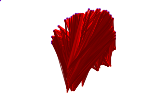

In [58]:
objeto=compose(context(units=UnitBox(0,0,65,65)), lineas...,  (context(),circle(GDxs, GDys, [0.5]), 
fill(RGB(0.4,0.0,0.76))), (context(), circle(CAxs, CAys, [0.34]), fill("tomato")))

In [64]:
draw(SVG("ConexionesRevueltasJacard01.svg", 20cm,20cm), objeto)

In [96]:
Significancias=readdlm("MuchasEspigas/SignificanciaEnero2016.dat");

In [104]:
lineas=Any[]
GDxs=Int[]
GDys=Int[]
CAxs=Int[]
CAys=Int[]
PuntosGD=Set()
PuntosCA=Set()
tantos=0
for a =1:size(Significancias)[1]
    MuestraGDCA=vec(Significancias[a,1:4])
    MuestraLinea=Significancias[a,5]
    GDx=MuestraGDCA[1]
    GDy=MuestraGDCA[2]
    CAx=MuestraGDCA[3]
    CAy=MuestraGDCA[4]
  #  Peso=MuestraLinea[1]/(MuestraLinea[2]+MuestraLinea[3]-MuestraLinea[1]) #Jaccard
    Peso=MuestraLinea
    
    
    if !(in([GDx,GDy],PuntosGD))
    push!(GDxs,GDx)
        push!(GDys,GDy)
    end
    
    if !(in([CAx,CAy],PuntosCA))
        push!(CAxs,CAx)
        push!(CAys,CAy)
    end
        
    push!(PuntosGD,[GDx,GDy])
    push!(PuntosCA,[CAx,CAy])
   
        
        
    if(Peso>0.99)
        PesoNormalizadoDibujo=256*(1.0-Peso)/0.1
        push!(lineas, 
        (context(), 
        line([(GDx,GDy),(CAx,CAy)]), linewidth(PesoNormalizadoDibujo/512), 
        stroke(HSI(PesoNormalizadoDibujo,256-PesoNormalizadoDibujo,PesoNormalizadoDibujo)
        )))
        tantos+=1
    end
end

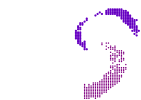

In [105]:
objeto=compose(context(units=UnitBox(0,0,65,65)),  (context(),circle(GDxs, GDys, [0.5]), 
fill(RGB(0.4,0.0,0.76))), (context(), circle(CAxs, CAys, [0.34]), fill("purple")), lineas...,fill("black"))

In [95]:
draw(SVG("ConexionesSignificanciaExperomento01.svg", 20cm,20cm), objeto)

In [99]:
tantos

597